In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression 
from imblearn.over_sampling import RandomOverSampler 

import warnings 
warnings.filterwarnings("ignore")

In [3]:
data =pd.read_csv(r"C:\Users\MYPC\Downloads\Rainfall.csv")

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [7]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [11]:
data.sample(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
284,11,1018.0,22.1,20.5,18.5,16.6,78,88,yes,0.0,20.0,38.3
169,18,1010.5,30.8,29.3,27.7,26.0,83,81,yes,2.3,200.0,19.8
32,2,1024.4,11.2,10.4,9.4,6.8,79,94,yes,0.0,10.0,27.3
178,27,1007.5,35.1,31.1,28.6,26.7,78,61,yes,8.6,60.0,15.7
77,18,1012.0,21.9,19.5,17.2,19.0,97,92,yes,0.1,30.0,13.1


In [29]:
data.shape

(366, 12)

In [13]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [17]:
data.rename(str.strip, axis='columns', inplace=True)


In [19]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [23]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [25]:
data.duplicated().any()

False

In [27]:
data.T.duplicated().any()

False

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [33]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mean())
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())

In [35]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

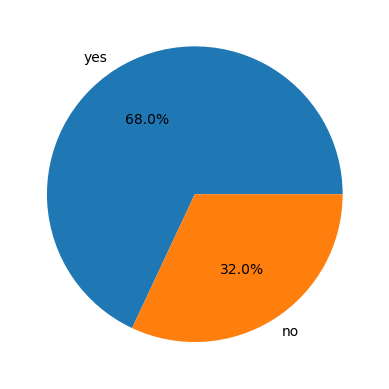

In [37]:
plt.pie(data['rainfall'].value_counts().values,
        labels = data['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [39]:
data.groupby("rainfall").mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [41]:
data.drop("day" , axis=1 , inplace =True)

In [43]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

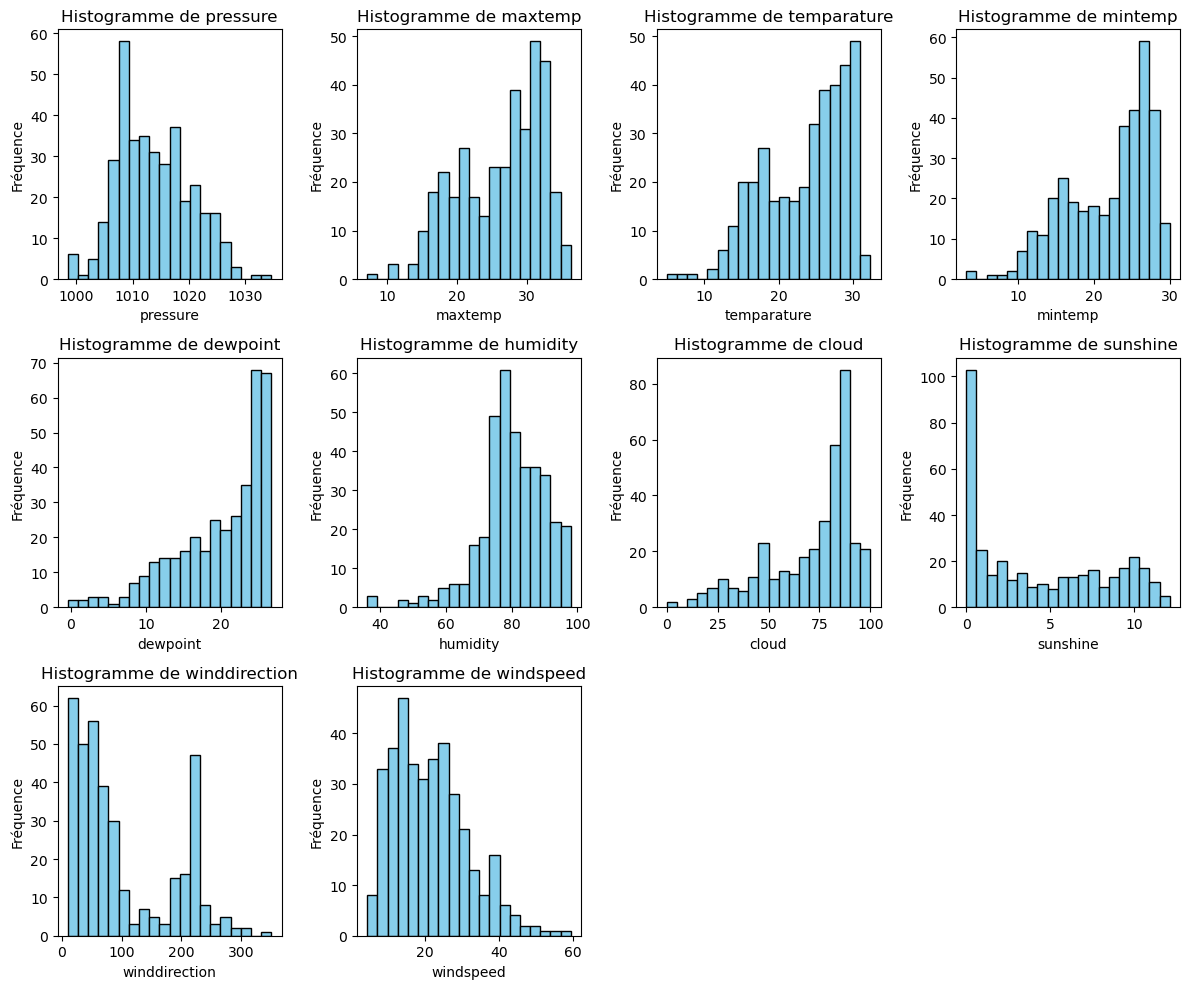

In [45]:
columns_to_plot = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
                   'cloud', 'sunshine', 'winddirection', 'windspeed']
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i) 
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogramme de {column}') 
    plt.xlabel(column) 
    plt.ylabel('Fréquence')

plt.tight_layout() 
plt.show()


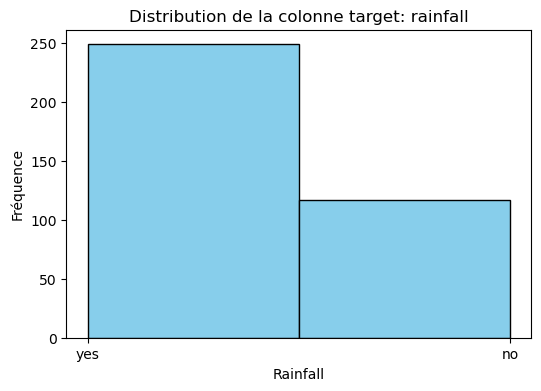

In [57]:
plt.figure(figsize=(6, 4))
plt.hist(data['rainfall'],bins=2, color='skyblue', edgecolor='black') 
plt.title('Distribution de la colonne target: rainfall') 
plt.xlabel('Rainfall') 
plt.ylabel('Fréquence')  

plt.show()

In [60]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [64]:
data.replace({"yes":"1" ,"no" :"0"} , inplace=True)

In [66]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [68]:
data.dtypes

pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity           int64
cloud              int64
rainfall          object
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

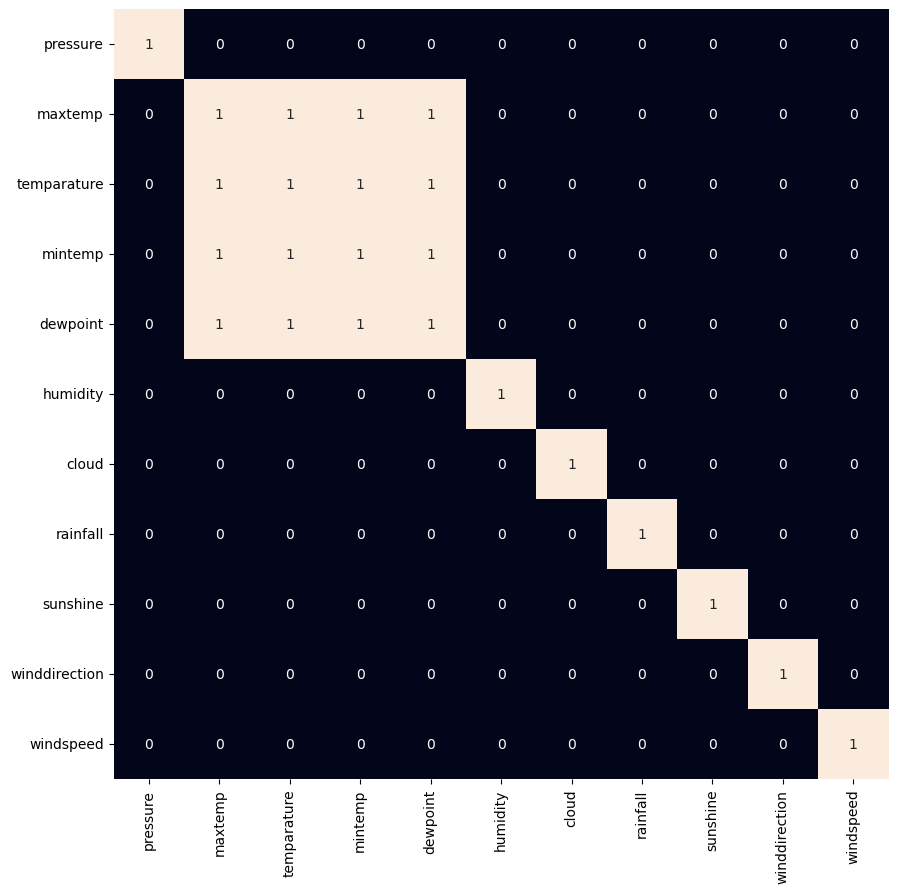

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [72]:
data.drop(["maxtemp","mintemp"], axis=1 , inplace=True)

In [105]:
data.columns

Index(['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'rainfall',
       'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
data[['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud',
       'sunshine', 'winddirection', 'windspeed']] = scaler.fit_transform(data[['pressure', 'temparature', 'dewpoint', 'humidity', 'cloud',
       'sunshine', 'winddirection', 'windspeed']])

In [113]:
data["rainfall"]=data["rainfall"].astype("int64")

In [115]:
data.dtypes

pressure         float64
temparature      float64
dewpoint         float64
humidity         float64
cloud            float64
rainfall           int64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [119]:
X = data.drop("rainfall" , axis=1)
y =data["rainfall"]

In [121]:
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size = 0.2 , stratify = y , random_state= 4)

In [123]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
x,Y = ros.fit_resample ( X_train , y_train)

In [125]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
for i in range(3):
    models[i].fit(x,Y)
    print(f'{models[i]} : ')
    train_preds = models[i].predict_proba(x)
    print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))
    test_preds = models[i].predict_proba(X_test)
    print('Testing Accuracy : ', metrics.roc_auc_score(y_test, test_preds[:,1]))
    print()
    


LogisticRegression() : 
Training Accuracy :  0.8679578798515188
Testing Accuracy :  0.915

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Testing Accuracy :  0.8675

SVC(probability=True) : 
Training Accuracy :  0.8992070907300321
Testing Accuracy :  0.87583333

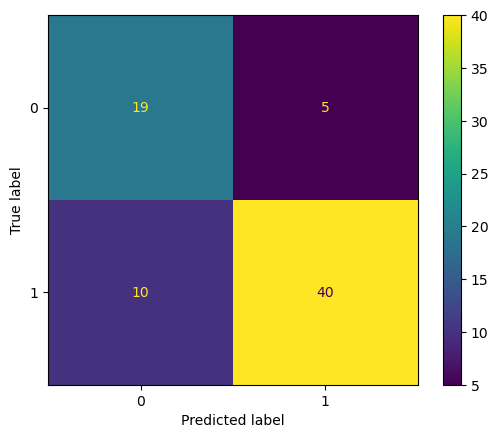

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models[2] , X_test , y_test)
plt.show()